## Code

### Libs

In [10]:
import numpy as np
import matplotlib.pyplot as plt

### DataProcess

In [11]:
def readDataset(idx):
    file = open('{0}.txt'.format(idx), 'r')
    int(file.readline())

    trN = int(file.readline())
    train = np.array([[float(x) for x in file.readline().split()] for _ in range(trN)])
    train_X = train[:, :-1]
    train_y = train[:, -1]
    
    teN = int(file.readline())
    test = np.array([[float(x) for x in file.readline().split()] for _ in range(teN)])
    test_X = test[:, :-1]
    test_y = test[:, -1]
    
    train_X = np.hstack(([[1] for _ in train_X], train_X))
    test_X = np.hstack(([[1] for _ in test_X], test_X))
    
    file.close()
    
    return train_X, train_y, test_X, test_y

### Error Funcs

In [12]:
def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

In [13]:
def nrmse(X, theta, y):
    sum_errors = sum([(a - b) ** 2 for (a, b) in zip(y, X @ theta)])
    return np.sqrt(sum_errors / len(y)) / (np.max(y) - np.min(y))

### Algorithms

In [14]:
def processPseudoInvertedMatrix(train_X, train_y, test_X, test_y):
    theta = np.linalg.pinv(train_X) @ train_y
    return nrmse(test_X, theta, test_y), nrmse(train_X, theta, train_y)

In [15]:
def processGradientDescent(train_X, train_y, test_X, test_y, steps):
    testNrmses = []
    trainNrmses = []
    
    theta = np.zeros(train_X.shape[1], dtype=float)
    for i in range(steps):
        j = np.random.randint(0, len(train_X))
        g = (np.dot(train_X[j], theta) - train_y[j]) * train_X[j]
        
        den = np.dot(g, train_X[j])
        if np.isclose(den, 0):
            alpha = 1e-19
        else:
            alpha = (np.dot(theta, train_X[j]) - train_y[j]) / den
        
        theta = theta * (1 - alpha) - alpha * g
        
        if i % 40 == 20:
            testNrmses.append(nrmse(test_X, theta, test_y))
            trainNrmses.append(nrmse(train_X, theta, train_y))
    
    return testNrmses, trainNrmses

### Execute Preps

In [16]:
def processDatasetByIndex(idx):
    train_X, train_y, test_X, test_y = readDataset(idx)
    
    mtestNrmse, mtrainNrmse = processPseudoInvertedMatrix(train_X, train_y, test_X, test_y)
    gtestNrmses, gtrainNrmses = processGradientDescent(train_X, train_y, test_X, test_y, 10000)
    
    stps = [1 + 40 * i for i in range(len(gtestNrmses))]
    
    plt.plot(stps, gtestNrmses, label='test GradientDescent')
    plt.plot(stps, gtrainNrmses, label='train GradientDescent')
    plt.plot(stps, np.repeat(mtestNrmse, len(stps)), label='test PseudoInvertedMatrix')
    plt.plot(stps, np.repeat(mtrainNrmse, len(stps)), label='train PseudoInvertedMatrix')
    plt.xlabel('it')
    plt.ylabel('NRMSE err')
    plt.legend()
    plt.show()

## Results

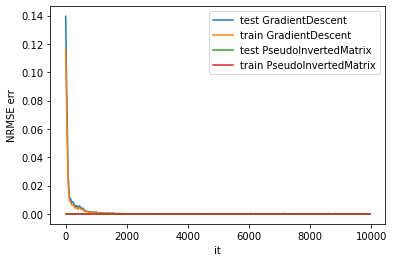

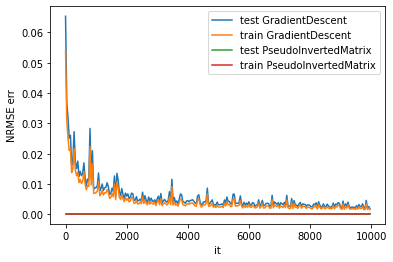

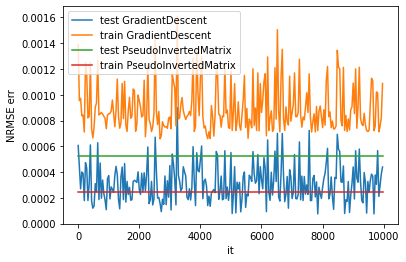

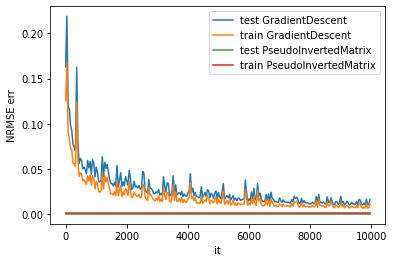

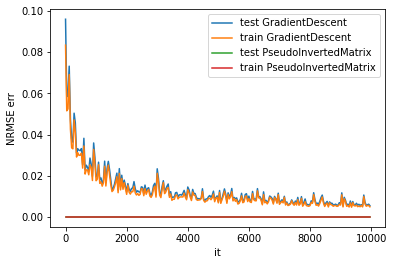

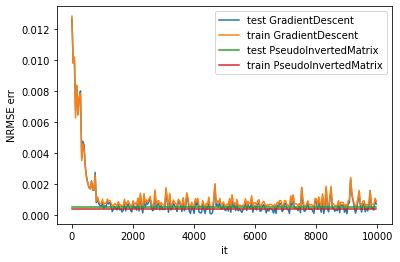

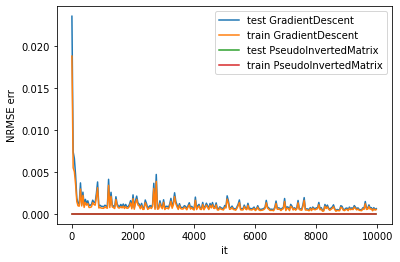

In [17]:
for i in range(7):
  processDatasetByIndex(i+1)